# <font color="blue">Project1: Virtual Makeup </font>
We have already seen interesting applications of facial features and landmarks such as aging, beardify, face swap etc.

In this project, you will build features for a Virtual Makeup application! Given below are a few features that are required to be built in the application. 

1. Apply Lipstick
1. Apply Blush
1. Apply Eye-Liners or Eye-Lashes
1. Apply Glasses
1. Apply Eye Color ( Lens Color)
1. Apply Hat/Cap
1. Apply Ear-Rings
1. Change Hair Color

### <font color="green">Your Task</font>
Implement any 2 features from the list above

We have provided a sample image. You can use your own image for experimentation as well as come up with other interesting features.

### <font color="green">Submission</font>
Once you are done, you have to create a video, explaining the main part of the code, upload it to youtube or any other video sharing service and provide the link in the form given in the submission section of the course.

### <font color="green">Marks Distribution</font>

1. Feature 1: 35 marks
1. Video for Feature 1: 15 marks
1. Feature 2: 35 marks
1. Video for Feature 2: 15 marks

In [1]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load faceBlendCommon file to use common functions.

In [2]:
import faceBlendCommon as fbc

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# <font color="blue">Load landmark detector</font>
We have provided code for loading the model for landmark detector.

In [4]:
# Landmark model location
PREDICTOR_PATH =  "shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# <font color="blue">Read Image</font>
We load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib.

### <font color="red">You can also use any other image.</font> 

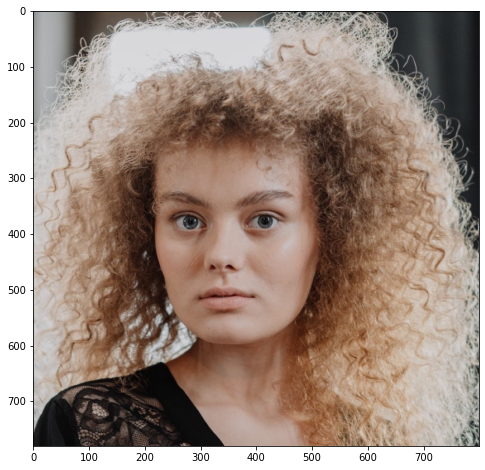

In [5]:
girl = cv2.imread("girl.jpg")

plt.imshow(girl[...,::-1]);

# <font color="blue">Calculate Landmarks</font>
We are providing code for calculating the landmarks in this section. So that you can focus on the feature implementation.

In [6]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, girl[...,::-1])
print(points)

[(216, 375), (217, 411), (224, 446), (233, 480), (242, 515), (258, 547), (283, 574), (313, 594), (350, 600), (390, 595), (430, 579), (464, 557), (488, 524), (501, 487), (508, 447), (513, 408), (514, 369), (223, 343), (241, 326), (268, 325), (293, 333), (317, 346), (362, 345), (389, 331), (418, 321), (449, 321), (474, 336), (338, 374), (337, 397), (335, 419), (333, 442), (315, 465), (326, 468), (337, 471), (351, 468), (364, 465), (252, 378), (268, 368), (289, 369), (307, 385), (287, 390), (266, 389), (382, 384), (401, 369), (423, 367), (441, 375), (426, 387), (404, 389), (293, 517), (310, 503), (327, 496), (340, 500), (353, 496), (376, 502), (401, 514), (377, 528), (356, 535), (341, 536), (326, 535), (310, 530), (303, 516), (327, 512), (340, 512), (354, 511), (391, 513), (354, 512), (341, 513), (327, 513)]


# <font color="blue">TODO</font>
You have to implement 2 features from the above list. You can also think about a new feature and implement. 


# <font color="blue">Feature 1</font>
Write code for the first feature you want to implement from the above list. Display the output image after writing the code.

In [7]:
# saturate color of hair
def saturateImage(im, scaleBy):

  # Convert input image to HSV
  imgHSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    
  #H, S, V = cv2.split(imgHSV)
  #index = S!=0

  # Multiple saturation by the scale
  imgHSV[:, :, 1] = np.clip(imgHSV[:, :, 1]*scaleBy, 0, 255)

  # Convert HSV to RGB
  outImage = cv2.cvtColor(imgHSV, cv2.COLOR_HSV2BGR)

  return outImage

In [8]:
hair = cv2.imread('hair_info/hair.png')
output = saturateImage(hair, 4.0)
mask = cv2.imread('hair_info/mask.png')


center1X = int(mask.shape[1]/2.0)
center1Y = int(mask.shape[0]/2.0)
center1 = (center1X, center1Y)
clonedOutput = cv2.seamlessClone(output, girl, 
                               mask, center1, 
                               cv2.NORMAL_CLONE)

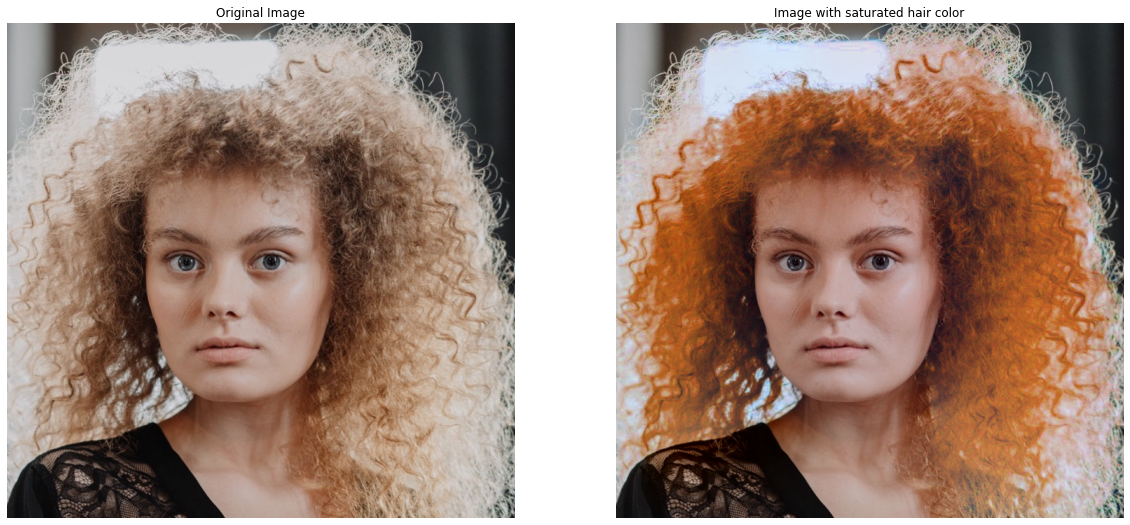

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(girl[...,::-1]); plt.title("Original Image")
ax = plt.axis('off')

plt.subplot(122)
plt.imshow(clonedOutput[:,:,::-1]); plt.title("Image with saturated hair color")
ax = plt.axis('off')

# <font color="blue">Feature 2</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

In [10]:
def getSavedPoints(landmarksFile):
    points = []
    lines = np.loadtxt(landmarksFile, dtype='uint16')
  
    for p in lines:
        points.append((p[0], p[1]))
  
    return points 

In [11]:
overlayFile = "lips_info/lips_for_mask.png"
img = cv2.imread(overlayFile,1)

maskfile = 'lips_info/mask.png'
mask = cv2.imread(maskfile)

b,g,r = cv2.split(img)

lips = img.copy()
lips = np.float32(lips)/255

lipsAlphaMask = mask.copy()
lipsAlphaMask = np.float32(lipsAlphaMask)

In [12]:
featurePoints1 = getSavedPoints( 'lips_info/lips_landmarks' + ".txt")

sizeImg1 = lips.shape    
rect = (0, 0, sizeImg1[1], sizeImg1[0])
dt = fbc.calculateDelaunayTriangles(rect, featurePoints1)

if len(dt) == 0:
    print("No delaunay triangle found")

In [13]:
selectedIndex = list(range(48,68))

img_hair = clonedOutput
targetImage = img_hair.copy()
height, width = targetImage.shape[:2]

points2 = fbc.getLandmarks(faceDetector, landmarkDetector, cv2.cvtColor(targetImage, cv2.COLOR_BGR2RGB), 1)
featurePoints2 = []
for p in selectedIndex:
    pt = points2[p]
    pt = fbc.constrainPoint(pt, width, height)
    featurePoints2.append(pt)

targetImage = np.float32(targetImage)/255

lipsWarped = np.zeros(targetImage.shape)
lipsAlphaWarped = np.zeros(targetImage.shape)

# Apply affine transformation to Delaunay triangles
for i in range(0, len(dt)):
    t1 = []
    t2 = []

    #get points for img1, img2 corresponding to the triangles
    for j in range(0, 3):
      t1.append(featurePoints1[dt[i][j]])
      t2.append(featurePoints2[dt[i][j]])

    fbc.warpTriangle(lips, lipsWarped, t1, t2)
    fbc.warpTriangle(lipsAlphaMask, lipsAlphaWarped, t1, t2)
    
lipsWarpedMask = lipsAlphaWarped/255

(-0.5, 798.5, 779.5, -0.5)

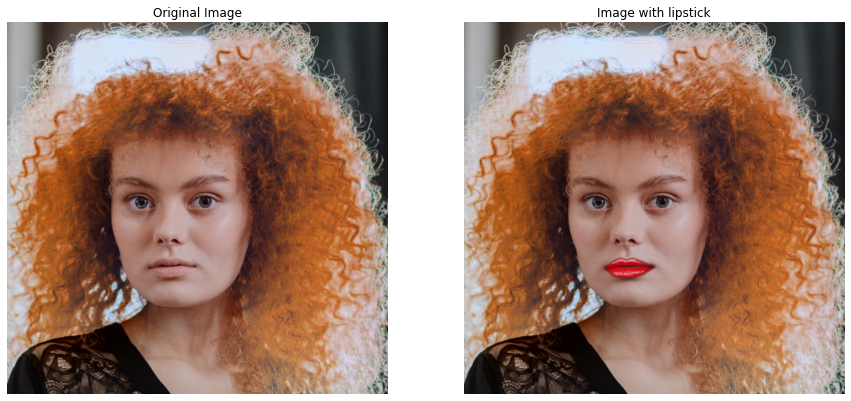

In [14]:
lipsWarpedMask = cv2.GaussianBlur(lipsWarpedMask, (7, 7), 0, 0)

temp1 = np.multiply(targetImage, 1.0 - lipsWarpedMask)
temp2 = np.multiply(lipsWarped, lipsWarpedMask)

out = temp1 + temp2;
plt.figure(figsize=[15,10])
plt.subplot(121);plt.imshow(targetImage[...,::-1]);plt.title("Original Image"); plt.axis('off')
plt.subplot(122);plt.imshow(out[...,::-1]);plt.title("Image with lipstick"); plt.axis('off')

In [15]:
out = np.uint8(255*out)

In [16]:
glass = cv2.imread("glasses.png", -1)
glassbgr = glass[:,:,0:3]
glass_mask = glass[:,:,3]

In [17]:
def alphaBlend(glass, points, img, orig_mask_g):
    origGlassHeight, origGlassWidth = glass.shape[:2]
    orig_mask_inv_g = cv2.bitwise_not(orig_mask_g)
    
    glassWidth = abs(points[16][0] - points[1][0])
    glassHeight = int(glassWidth * origGlassHeight / origGlassWidth)
    
    glass = cv2.resize(glass, (glassWidth,glassHeight), interpolation = cv2.INTER_AREA)
    mask = cv2.resize(orig_mask_g, (glassWidth,glassHeight), interpolation = cv2.INTER_AREA)
    mask_inv = cv2.resize(orig_mask_inv_g, (glassWidth,glassHeight), interpolation = cv2.INTER_AREA)
    
    y1 = int(points[26][1])
    y2 = int(y1 + glassHeight)
    x1 = int(points[27][0] - (glassWidth/2) + 5)
    x2 = int(x1 + glassWidth)
    roi1 = img[y1:y2, x1:x2]
    roi_bg = cv2.bitwise_and(roi1,roi1,mask = mask_inv)
    roi_fg = cv2.bitwise_and(glass,glass,mask = mask)
    img[y1:y2, x1:x2] = cv2.add(roi_bg, roi_fg)
    
    return img

In [18]:
final_output = alphaBlend(glassbgr, points, out, glass_mask)

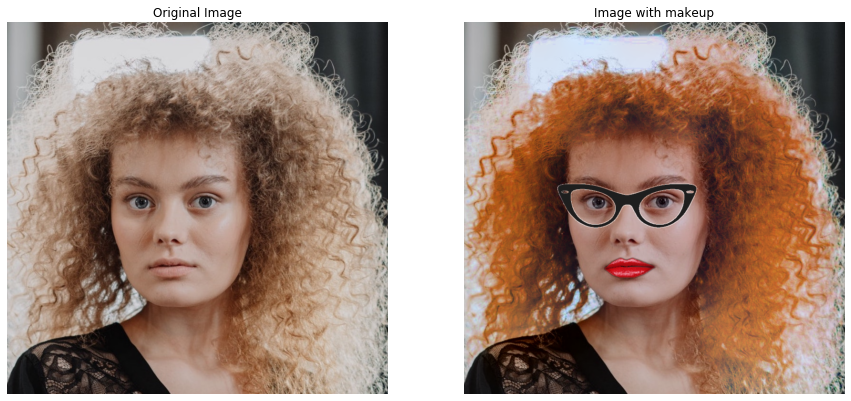

In [22]:
plt.figure(figsize=[15,10])
plt.subplot(121);plt.imshow(girl[...,::-1]);plt.title("Original Image"); plt.axis('off')
plt.subplot(122);plt.imshow(final_output[...,::-1]);plt.title("Image with makeup"); plt.axis('off');

In [21]:
cv2.imwrite("girl-with-makeup.jpg", final_output);